In [1]:
import pandas as pd
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [25]:
from pathlib import Path
csvpath = Path('./data/oil_futures_front.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,100.51,100.51,100.51,100.51,0.96,100.51,25.0,12833.0
2014-02-19,100.83,100.83,100.83,100.83,0.32,100.83,0.0,12833.0
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0


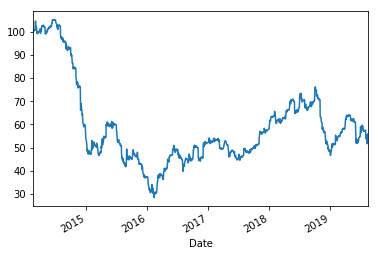

In [26]:
df.Settle.plot()

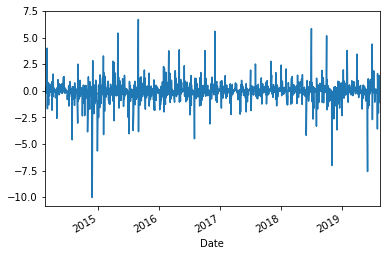

In [27]:
# Differencing the Settle price stationarizes the time series
df.Settle.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

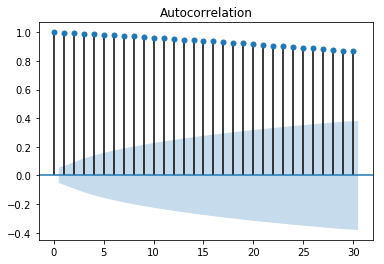

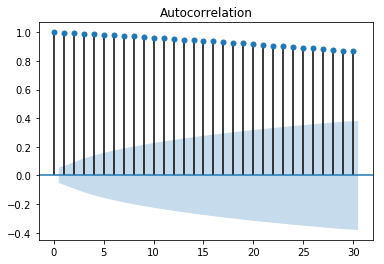

In [29]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df['Settle'], lags=30)

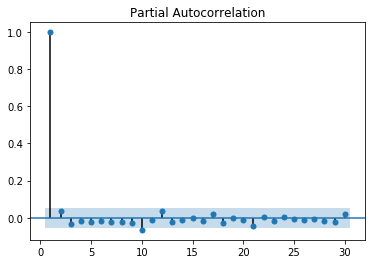

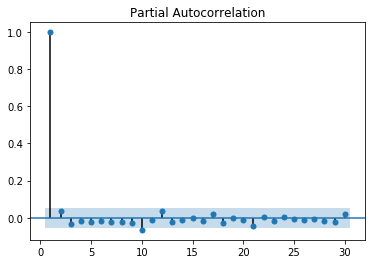

In [30]:
# Plot the partial autocorrelation of the returns
plot_pacf(df['Settle'], lags=30, zero=False)

# ARIMA Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
# Create an ARIMA model
model = ARIMA(df['Settle'], order=(2,1,1))

C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [46]:
# Fit the model to the data
results = model.fit()

In [47]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1380
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1939.200
Method:                       css-mle   S.D. of innovations              0.986
Date:                Sat, 30 Jan 2021   AIC                           3888.401
Time:                        12:57:27   BIC                           3914.550
Sample:                             1   HQIC                          3898.183
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0334      0.041     -0.821      0.412      -0.113       0.046
ar.L1.D.Settle     0.8282      0.046     18.193      0.000       0.739       0.917
ar.L2.D.Settle     0.1168      0.027      4.270      0.000       0.063       0.170
ma.L1.D.Settle    -0.9154      0.038    -24.075      0.000      -0.990      -0.841
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0514           +0.0000j            1.0514            0.0000
AR.2           -8.1406           +0.0000j            8.1406            0.5000
MA.1            1.0924           +0.0000j            1.0924            0.0000
-----------------------------------------------------------------------------
"""

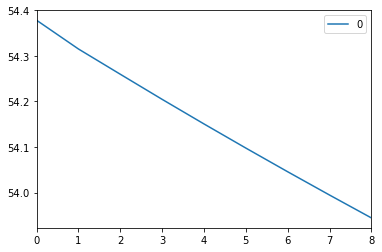

In [48]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=9)[0]).plot()